### C4021 - Group 4.2 
### Project work Weeks 7-9

#### Machine Learning Algorithm: SGD Regression
Random Forests: 

-This article was a great source of help: http://adataanalyst.com/scikit-learn/regression-scikit-learn/

- I got additional suggestions on using SGD from this article: http://sdsawtelle.github.io/blog/output/week2-andrew-ng-machine-learning-with-python.html

-This article was a useful source of dimension reduction techniques https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

-This article was also useful for Grid Search techniques
https://medium.com/@elutins/grid-searching-in-machine-learning-quick-explanation-and-python-implementation-550552200596

#### Dataset Information
_Source:_ Boston Housing Dataset - preloaded in scikit-learn.

**Content**
The data set is of housing pricesin Boston. It is a frequently used dataset in Machine Learning problems so this should give many alternative examples from which to learn. 

**Goal**
Finding potential hazardous and non-hazardous asteroids
Features responsible for claiming an asteroid to be hazardous

#### Notebook Structure
1. Data Loading and Pre-processing
2. Model training and testing
3. Model graphing
4. Model analysis: further eaxamination of significant features etc.

#### Team Contributions:
**Training data**

04-NOV-2018 B.Parle Source data identified, loaded and initial analysis. 


**Pre-processing**

04-NOV-2018 B.Parle Data Analysis and feature removal
05-NOV-2018 B.Parle Using correlation to remove features. Dummies for category data


**Algorithm training and evaluation**

05-NOV-2018 B.Parle Implemented SGD Regression and Grid Search to find best hyper parameters


**Visualisation of outputs**

04-NOV-2018 B.Parle Finalised a plot of actual versus predicted values to explore linear relationship


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [2]:
####################
#
# 1. Dataset Loading and Pre-processing
#
####################
boston = load_boston()
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
50.0 5.0 22.532806324110677


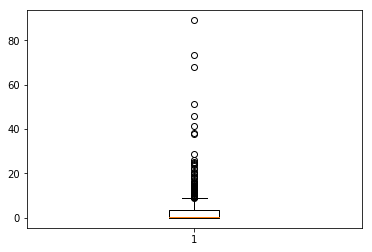

In [3]:
#boston.data
print (boston.data.shape)
print (boston.feature_names)
print (np.max(boston.target), np.min(boston.target), np.mean(boston.target))

#Create pandas dataframe for remaining work
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
#boston_df.describe()

#Use a basic boxplot to investigate data for outliers - follow up on the next section
plt.boxplot(boston_df['CRIM'])
plt.show()

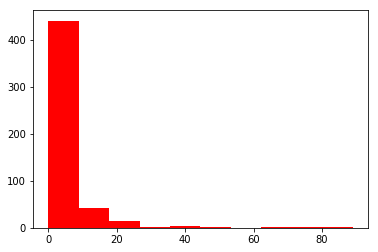

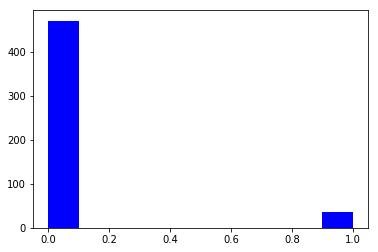

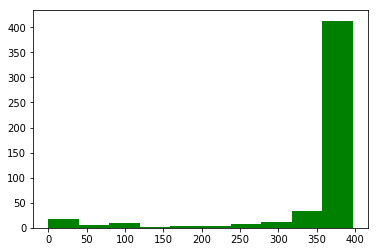

In [4]:
#Issues found during initial analysis that will need to be resolved:
#investigaste 'CRIM','CHAS','B' for outliers
_, myplt = plt.subplots()
myplt.hist(boston_df['CRIM'], color='r')
_, myplt = plt.subplots()
myplt.hist(boston_df['CHAS'], color='b')
_, myplt = plt.subplots()
myplt.hist(boston_df['B'], color='g')

#CRIM and B seem to have significant outliers. For now I will exclude as I want to focus on the 
#environmental factors i.e. ZN, INDUS, NOX, DIS, RAD, PTRATIO.
#Reduce array to interesting features
boston_df_reduced = pd.DataFrame(boston_df[['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','PTRATIO']])

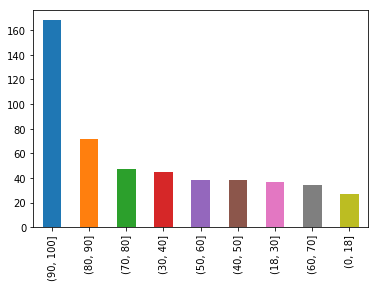

In [5]:
#Put age into categories
age_categories = np.array([0,18,30,40,50,60,70,80,90,100])
boston_df_age1 = pd.DataFrame(pd.cut(boston_df_reduced['AGE'],age_categories))
boston_df_age1.head()
boston_df_age1['AGE'].value_counts().plot(kind='bar')

In [6]:
#These age categories look good so add them back into the dataset
boston_df_reduced['AGECAT'] = pd.Series(pd.cut(boston_df_reduced['AGE'],age_categories))
boston_df_reduced = boston_df_reduced.drop(['AGE'],axis=1)
boston_df_reduced.head()

,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,PTRATIO,AGECAT
0,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,15.3,"(60, 70]"
1,0.0,7.07,0.0,0.469,6.421,4.9671,2.0,17.8,"(70, 80]"
2,0.0,7.07,0.0,0.469,7.185,4.9671,2.0,17.8,"(60, 70]"
3,0.0,2.18,0.0,0.458,6.998,6.0622,3.0,18.7,"(40, 50]"
4,0.0,2.18,0.0,0.458,7.147,6.0622,3.0,18.7,"(50, 60]"


In [7]:
#create dummy features for each AGECAT category
boston_dummies = pd.get_dummies(boston_df_reduced)
boston_dummies.head()

,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,PTRATIO,"AGECAT_(0, 18]","AGECAT_(18, 30]","AGECAT_(30, 40]","AGECAT_(40, 50]","AGECAT_(50, 60]","AGECAT_(60, 70]","AGECAT_(70, 80]","AGECAT_(80, 90]","AGECAT_(90, 100]"
0,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,15.3,0,0,0,0,0,1,0,0,0
1,0.0,7.07,0.0,0.469,6.421,4.9671,2.0,17.8,0,0,0,0,0,0,1,0,0
2,0.0,7.07,0.0,0.469,7.185,4.9671,2.0,17.8,0,0,0,0,0,1,0,0,0
3,0.0,2.18,0.0,0.458,6.998,6.0622,3.0,18.7,0,0,0,1,0,0,0,0,0
4,0.0,2.18,0.0,0.458,7.147,6.0622,3.0,18.7,0,0,0,0,1,0,0,0,0


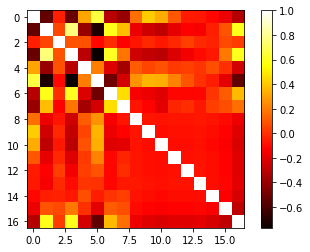

Correlation Matrix:
                         ZN     INDUS      CHAS       NOX        RM       DIS  \
ZN                1.000000 -0.533828 -0.042697 -0.516604  0.311991  0.664408   
INDUS            -0.533828  1.000000  0.062938  0.763651 -0.391676 -0.708027   
CHAS             -0.042697  0.062938  1.000000  0.091203  0.091251 -0.099176   
NOX              -0.516604  0.763651  0.091203  1.000000 -0.302188 -0.769230   
RM                0.311991 -0.391676  0.091251 -0.302188  1.000000  0.205246   
DIS               0.664408 -0.708027 -0.099176 -0.769230  0.205246  1.000000   
RAD              -0.311948  0.595129 -0.007368  0.611441 -0.209847 -0.494588   
PTRATIO          -0.391679  0.383248 -0.121515  0.188933 -0.355501 -0.232471   
AGECAT_(0, 18]    0.167824 -0.170312 -0.064720 -0.248369  0.120725  0.262159   
AGECAT_(18, 30]   0.418195 -0.246704 -0.016732 -0.280068  0.056049  0.352730   
AGECAT_(30, 40]   0.331701 -0.291750 -0.057806 -0.300793  0.090935  0.338709   
AGECAT_(40, 50]   0

In [8]:
#examine correlation and plot a heatmap: 
#    "corr_mat = np.corrcoef(X,rowvar=False)\n",

corr_mat = boston_dummies.corr()
plt.imshow(corr_mat, cmap='hot')
plt.colorbar()
plt.show()
print('Correlation Matrix:\n',corr_mat)

In [9]:
#From the correlation matrix we see these strong correlations (> 0.6)
#col ZN and DIS corr=0.664408
#col INDUS and NOX corr=0.763651
#Let's drop columns ZN and INDUS
boston_df_final = boston_dummies.drop(['ZN','INDUS'],axis=1)

In [10]:
####################
#
# 2. Train & Test
#
####################

#Prior to training, scale the data
myscaler = StandardScaler()
boston_df_scaled = pd.DataFrame(myscaler.fit_transform(boston_df_final),columns=boston_df_final.columns)

#Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(boston_df_scaled, boston.target, test_size=0.3, random_state=39)
#Seemingly SGD prefers tru matrix inputs
X_train_as_matrix = X_train.values
X_test_as_matrix = X_test.values

In [11]:
#Fit the model
my_sgd = SGDRegressor(alpha=0.0001, learning_rate='invscaling', loss='squared_loss', \
                      max_iter=1000, random_state=None, average=False, penalty=None)
my_sgd.fit(X_train_as_matrix, y_train)

#SGDRegressor(alpha=0.0001, learning_rate='invscaling', loss='squared_loss', \
#             max_iter=1000, n_iter=None, random_state=None)


#SGDRegressor(alpha=0.0001, average=False, early_stopping=False, \
#       epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.15, \
#       learning_rate='invscaling', loss='squared_loss', max_iter=1000, \
#       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25, \
#       random_state=None, shuffle=True, tol=None, validation_fraction=0.1, \
#       verbose=0, warm_start=False)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [12]:

#score the model using the test dataset
sgd_score = my_sgd.score(X_test_as_matrix,y_test)
print('Overall score = {}%'.format(round(sgd_score * 100, 2)))
print('feature importances:\n', my_sgd.coef_)

Overall score = 52.3%
feature importances:
 [ 0.86014069 -2.33047381  5.08911835 -2.3079769  -0.8649146  -2.06687183
  0.35073701  0.64603539  0.68758729  0.37979953  0.17094351  0.22248636
 -0.32439675 -0.22843606 -0.9971983 ]


In [13]:
#Try get a better model using Grid Search
# a suggested rule of thumb is n_iter = np.ceil(10**6 / n)
# n_iter = (10**6 / 506) = 1976  - add this to the params below
parameters = {'loss':('squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'),
              'max_iter':(100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1976, 5000),}
my_gridsearch = GridSearchCV(my_sgd, parameters, cv=5)
my_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ('squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'), 'max_iter': (100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1976, 5000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [14]:
#exmaine best fit parameters
print('Best Estimator:\n',my_gridsearch.best_estimator_)
print('Best Score:\n',my_gridsearch.best_score_)
print('Best Parameters:\n',my_gridsearch.best_params_)
pd_cv_results = pd.DataFrame(my_gridsearch.cv_results_)
print('CV Results:\n',pd_cv_results)

Best Estimator:
 SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_epsilon_insensitive', max_iter=500, n_iter=None,
       penalty=None, power_t=0.25, random_state=None, shuffle=True,
       tol=None, verbose=0, warm_start=False)
Best Score:
 0.6456637043508556
Best Parameters:
 {'loss': 'squared_epsilon_insensitive', 'max_iter': 500}
CV Results:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.004588      0.000638         0.000452        0.000078   
1        0.007174      0.000056         0.000328        0.000039   
2        0.009830      0.000688         0.000313        0.000058   
3        0.011314      0.000078         0.000270        0.000028   
4        0.014214      0.000327         0.000304        0.000039   
5        0.016531      0.000076         0.000299        0.000057   
6        0.019274      0.000494         0.000273        0.000027   

/Users/brianparle/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/brianparle/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/brianparle/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/brianparl

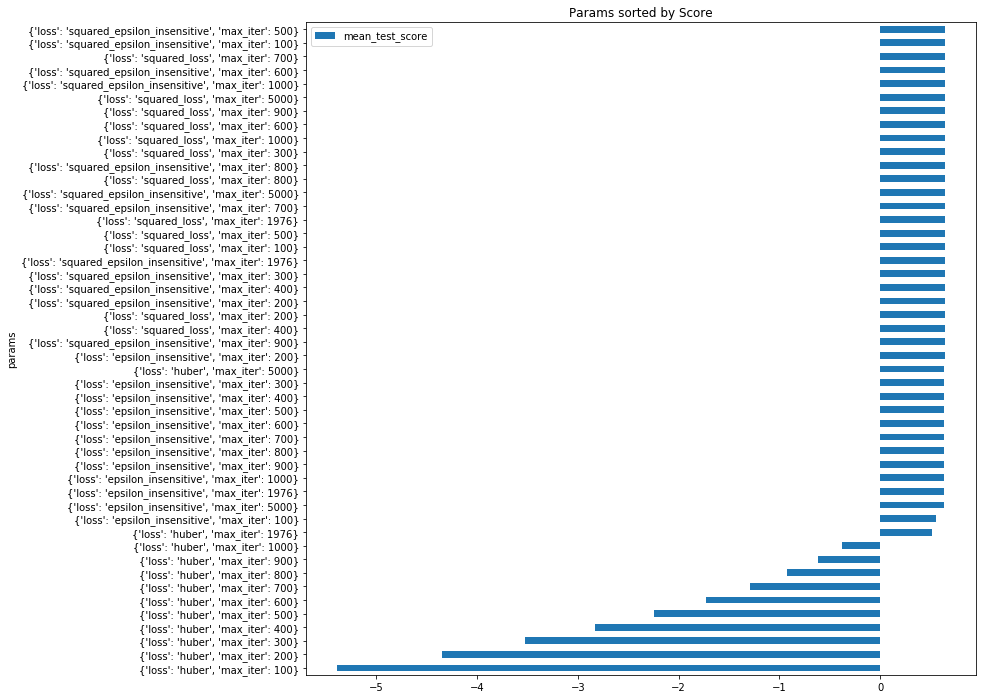

In [15]:
####################
#
# 3. Model Graphing
#
####################

#graph the various model scores
gridsearch_scores = pd.DataFrame(pd_cv_results[['params','mean_test_score']])
gridsearch_scores = gridsearch_scores.sort_values('mean_test_score',ascending=True).set_index('params')
gridsearch_scores.plot.barh(figsize=(12,12),title='Params sorted by Score')

In [16]:
####################
#
# 4. Model Analysis
#
####################

#Generate a set or predictions using the original data set
y_predict = pd.DataFrame(my_gridsearch.predict(boston_df_scaled))
y_predict.fillna(False)

,0
0,28.949511
1,23.854393
2,31.314728
3,28.617160
4,29.000316
5,23.781839
6,23.216324
7,21.098892
8,17.015517
9,20.656435


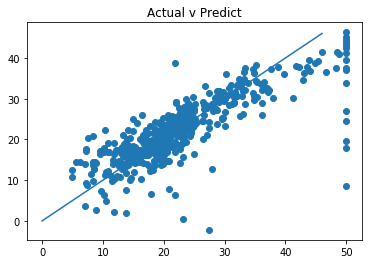

In [17]:
#Plot the predicted values versus the actual values
#x_values = np.array
#myplt_colours = {'True':'green','False':'red'}
#map_colour = lambda x: 'red' if x else 'green'
#myplt_hazardous_colour=[]
#for item in y_predict[0]:
#   myplt_hazardous_colour.append(map_colour(item))
#now plot the data
_, myplt = plt.subplots()
myplt.set_title('Actual v Predict')
myplt.scatter(boston.target, y_predict)
myplt.plot(np.arange(y_predict.max()))

#### Summary of observations
The accuracy of the model is quite poor (64.5%) and as can be seen from the plot of actual v precdicted it is not a linear relationship - as indicated by the straight line.